Populating the interactive namespace from numpy and matplotlib
16128
Espectro
Frecuencia Fundamental =  328.80859375
Deberia ser un Mi de 330Hz. Hay un error de: 1.19140625 Hz


`%matplotlib` prevents importing * from pylab and numpy


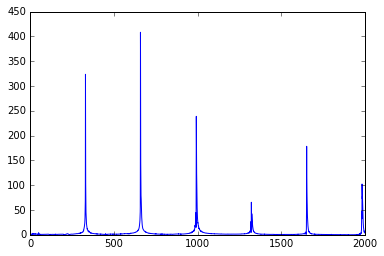

In [18]:
%pylab inline
import scipy.signal as sig
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

input_rate,input_sig=scipy.io.wavfile.read('Audios/ee.wav')


#spec = (abs(fft(input_sig)))/input_sig.size()
spec = fft(input_sig)
spec = abs(spec)
spec = spec/input_sig.size
spec = fftshift(spec)
frecs = fftfreq(input_sig.size, 1.0/input_rate)
frecs = fftshift(frecs)

#print 'Señal de audio'
#plt.plot(input_sig)
#plt.show()

start = len(spec)/2 #Al estar centrado en la mitad del vector, arranco a buscar la fundamental alli
stop = start + len(spec)/8 #Asumo que la encontrare seguramente entre la mitad y un octavo mas del vector.

spec_crop = spec[start:stop]
frec_crop = frecs[start:stop] #Recorta espectro y eje de frec para buscar alli solamente la nota.
print len(spec_crop)
print 'Espectro'
plt.plot(frec_crop,spec_crop)
xlim(0,2000)

#ylim(0,500)
#plt.show()
themax = amax(spec_crop)
#np.argmax(spec)


for i in range (0,len(spec_crop)):
    if spec_crop[i]>(themax/8):
        indice =i
        break

afr = abs(frec_crop[indice])
print 'Frecuencia Fundamental = ',afr

if afr<95 or (afr>161 and afr<170):   # Entra si es E o E*
    if afr<96:
        error = 82 - afr
        print 'Deberia ser un Mi de 82Hz. Hay un error de:', error,'Hz'
    
elif (afr>97 and afr<123) or (afr>209 and afr<232):   #Entra si es A o A*
    if afr<123:
        error = 110 - afr
        print 'Deberia ser un La de 110Hz. Hay un error de:', error,'Hz'

        
elif (afr>131 and afr<159) or (afr>271 and afr<311):
    if afr<159:
        error = 147 - afr
        print 'Deberia ser un Re de 147Hz. Hay un error de:', error,'Hz'
    
elif (afr>175 and afr<208) or (afr>361 and afr<443):
    if afr<208:
        error = 196 - afr 
        print 'Deberia ser un Sol de 196Hz. Hay un error de:', error,'Hz'

elif (afr>233 and afr<270) or (afr>444 and afr<576):
    if afr<270:
        error = 247 - afr 
        print 'Deberia ser un Si de 297Hz. Hay un error de:', error,'Hz'
        
elif (afr>312 and afr<360) or afr>577:
    if afr<360:
        error = 330 - afr 
        print 'Deberia ser un Mi de 330Hz. Hay un error de:', error,'Hz'

else:
    print "Estas muy desafinado..."
    print "Sacando turno al otorrino... espere por favor."